# `is_percolating`

This function is for quickly determining in the void phase of an image percolates between specified inlets and outlets.

In [11]:
import matplotlib.pyplot as plt

import porespy as ps

ps.visualization.set_mpl_style()

## `im`

The image of the porous material with `True` indicating the void phase. Note that this can be applied any boolean image with the foreground treated as the phase of interest.  The following two images at different porosities illustrate the function:

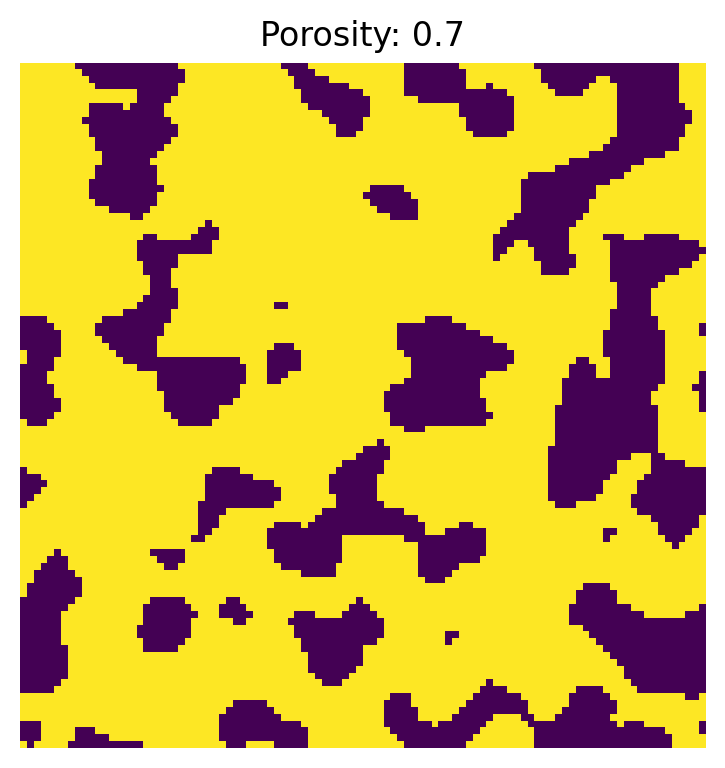

In [12]:
im1 = ps.generators.blobs([100, 100], porosity=0.7, seed=1)

fig, ax = plt.subplots(figsize=[4, 4])
ax.imshow(im1)
ax.axis(False)
ax.set_title("Porosity: 0.7");

The function returns `True` if the image has a percolating path and `False` otherwise. 

In [13]:
print(ps.metrics.is_percolating(im1, axis=1))

True


## `axis`

It is possible to specify which directions to check for percolation.  The default is to check across all principle axes and return a list of `True|False` values corresponding to each direction. Individual axes can also be given:

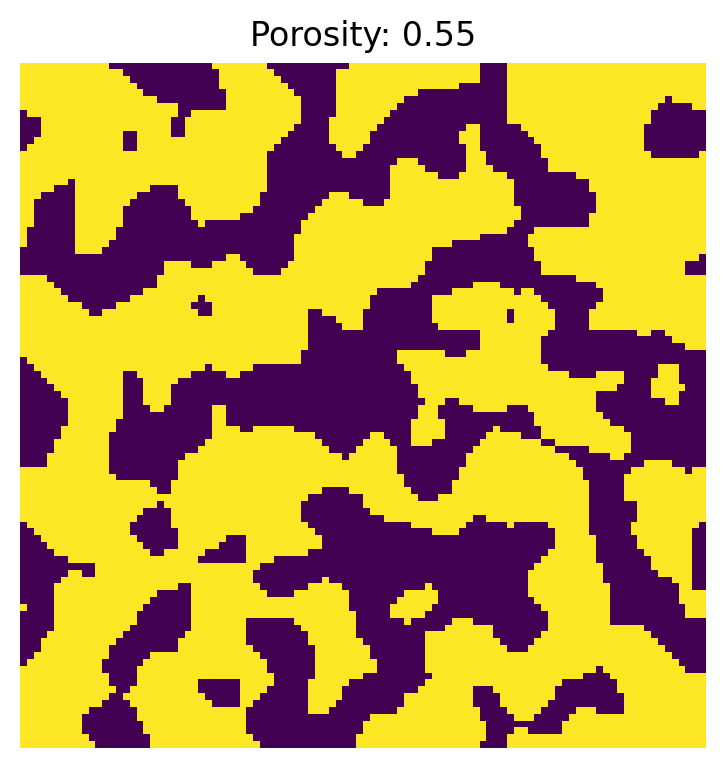

In [14]:
im1 = ps.generators.blobs([100, 100], porosity=0.6, seed=6)

fig, ax = plt.subplots(figsize=[4, 4])
ax.imshow(im1)
ax.axis(False)
ax.set_title("Porosity: 0.55");

The default behavior is to return a boolean for each axis:

In [15]:
print(ps.metrics.is_percolating(im1))

[False, True]


But an axis can also be specified:

In [16]:
print(ps.metrics.is_percolating(im1, axis=0))
print(ps.metrics.is_percolating(im1, axis=1))

False
True


## `inlets` and `outlets`

If more complicated inlet and outlet conditions are desired, they can be specified using boolean masks and provided to the `inlets` and `outlets` arguments:

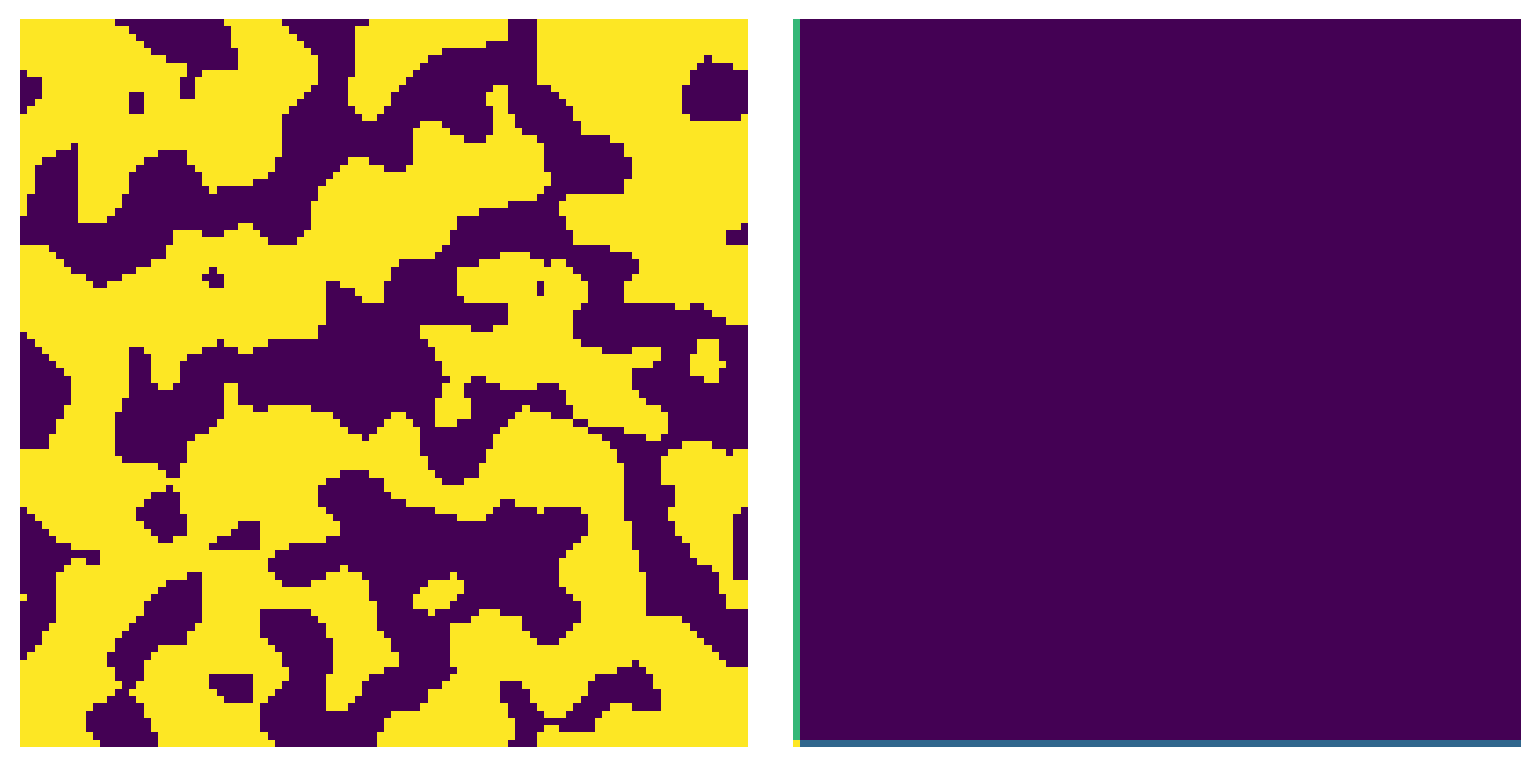

In [17]:
inlets = ps.generators.faces(im1.shape, inlet=0)
outlets = ps.generators.faces(im1.shape, inlet=1)
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(im1)
ax[0].axis(False)
ax[1].imshow(inlets * 1.0 + outlets * 2.0)
ax[1].axis(False);

In [18]:
print(ps.metrics.is_percolating(im1, inlets=inlets, outlets=outlets))

True


## `conn`
The connectivity to use when checking for percolation can also be specified.  The default is `min`, which means 4 neighbors in 2D and 6 in 3D, but it can also be `max` which adds diagonal connections to create 8 neighbors in 2D and 26 in 3D:

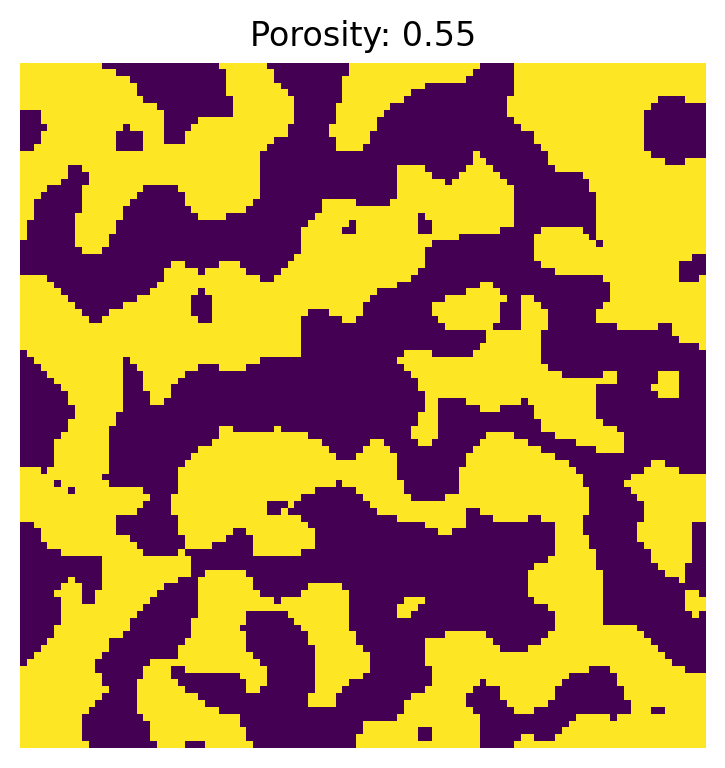

In [19]:
im2 = ps.generators.blobs([100, 100], porosity=0.52, seed=6)

fig, ax = plt.subplots(figsize=[4, 4])
ax.imshow(im2)
ax.axis(False)
ax.set_title("Porosity: 0.55");

In the image above there are clusters which would be considered connected using maximal connectivity, but not otherwise:

In [20]:
print(ps.metrics.is_percolating(im2, axis=1, conn="min"))
print(ps.metrics.is_percolating(im2, axis=1, conn="max"))

False
True
